# A/B Testing

In [7]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu, shapiro, levene
%matplotlib inline

In [8]:
# Dataset loading
df = pd.read_csv("marketing_AB.csv") 
print(df.head())

   Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14  


In [9]:
df.shape

(588101, 7)

In [10]:
# Data Cleaning 
# Dop index and user_id columns
df = df.drop(columns=[df.columns[0], 'user id'])


In [11]:
df.shape

(588101, 5)

In [12]:
# Data Type Separation : categoriacal, numerical
cat_cols = ['test group', 'converted', 'most ads day', 'most ads hour']
num_cols = ['total ads']
df_cat = df[cat_cols]
df_num = df[num_cols]

In [13]:
# Checking unique values per cat column
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

test group: ['ad' 'psa']
converted: [False  True]
most ads day: ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
most ads hour: [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


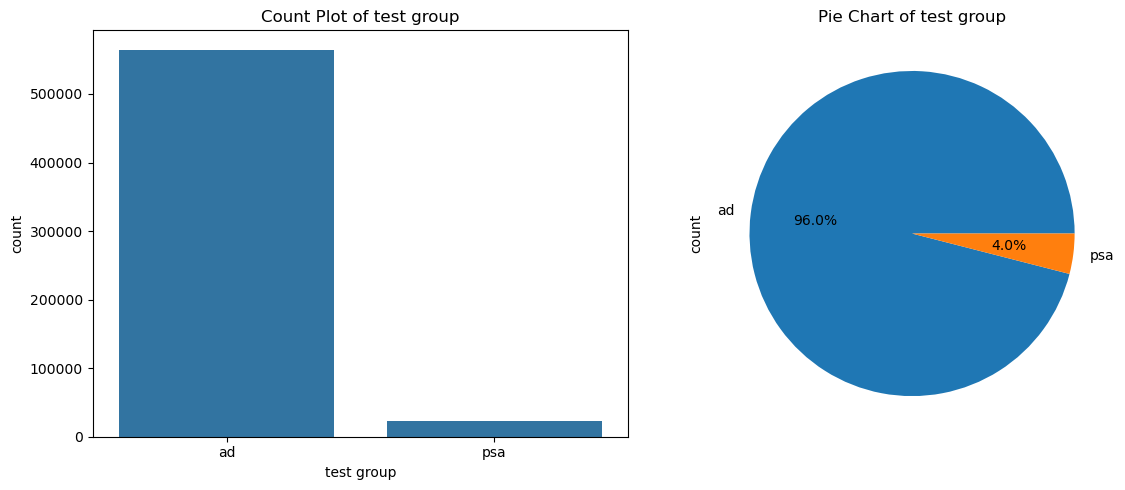

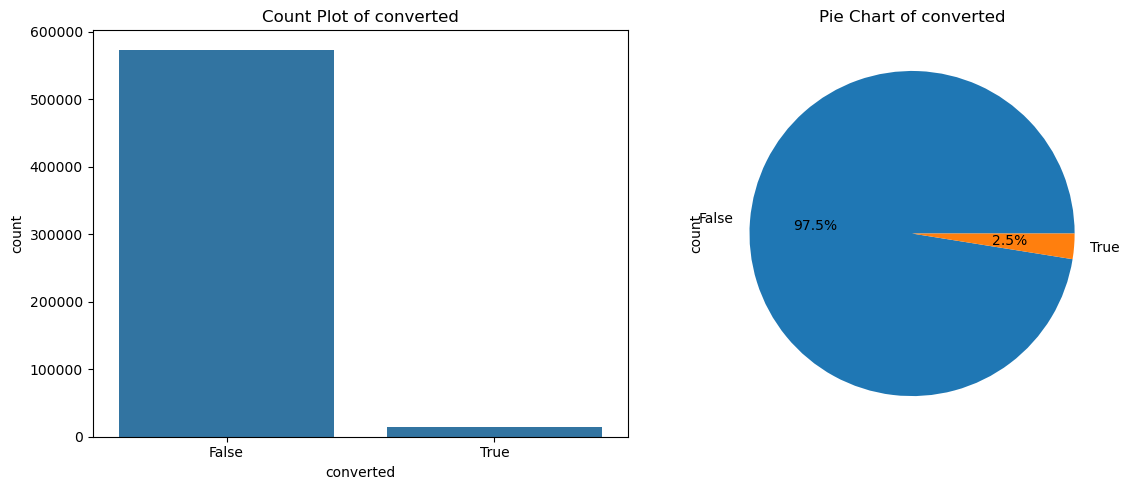

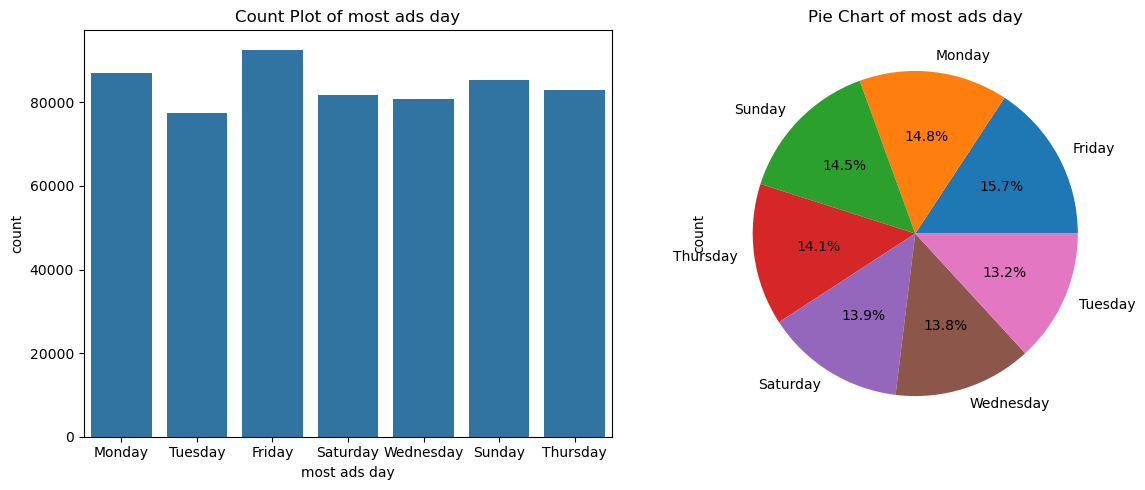

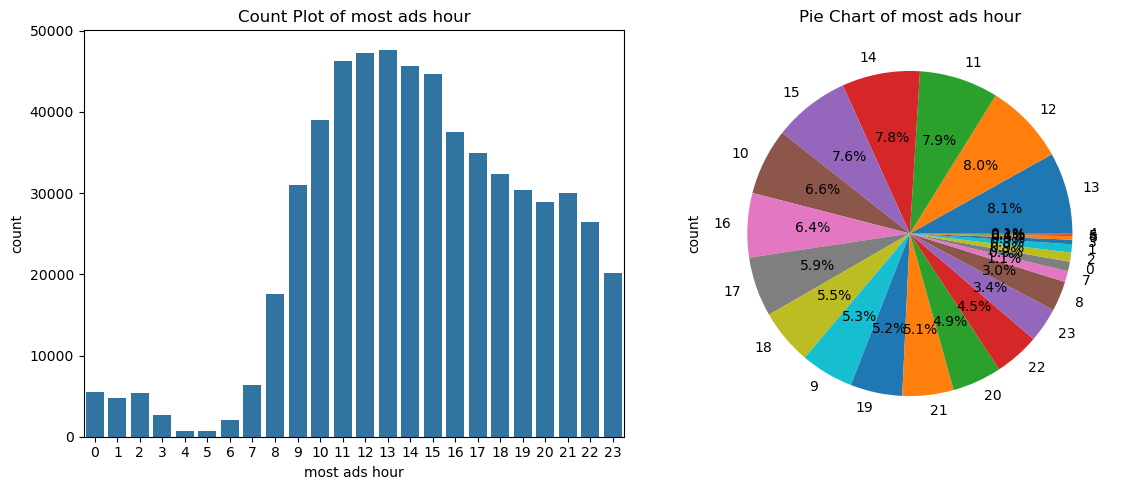

In [14]:
# Univariate Analysis
for var in cat_cols:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=var, data=df)
    plt.title(f"Count Plot of {var}")

    plt.subplot(1, 2, 2)
    df[var].value_counts().plot.pie(autopct="%1.1f%%")
    plt.title(f"Pie Chart of {var}")
    plt.tight_layout()
    plt.show()

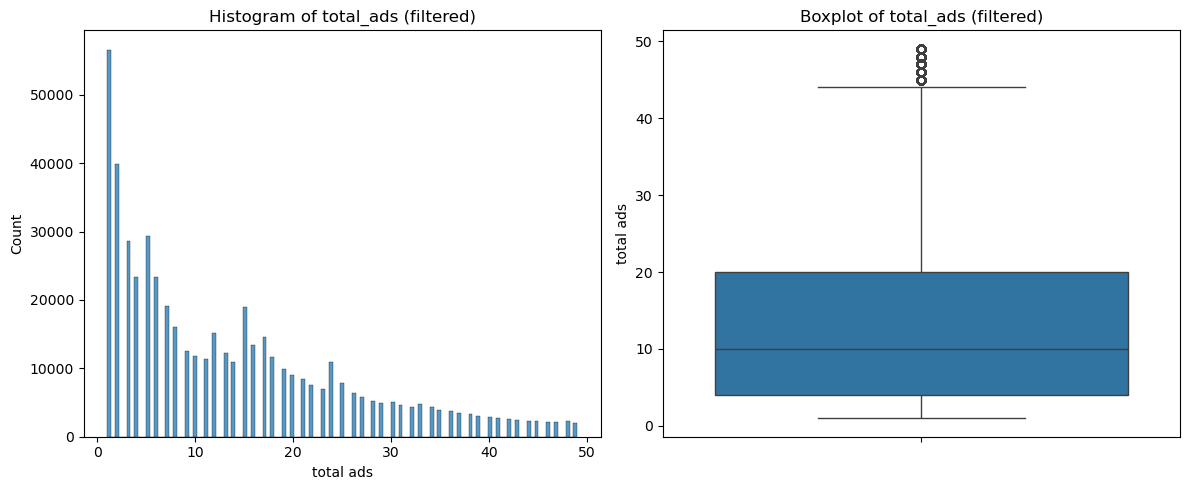

In [16]:
# for total_ads
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[df['total ads'] < 50]['total ads'], kde=False)
plt.title("Histogram of total_ads (filtered)")

plt.subplot(1, 2, 2)
sns.boxplot(y=df[df['total ads'] < 50]['total ads'])
plt.title("Boxplot of total_ads (filtered)")
plt.tight_layout()
plt.show()

converted      False     True 
test group                    
ad          0.974453  0.025547
psa         0.982146  0.017854


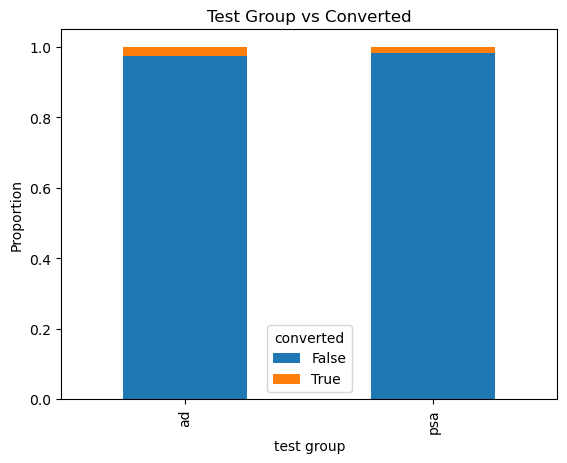

In [18]:
# SECTION 7: Bivariate Analysis - Test Group vs Converted
ct = pd.crosstab(df['test group'], df['converted'], normalize='index')
print(ct)
ct.plot(kind='bar', stacked=True)
plt.title("Test Group vs Converted")
plt.ylabel("Proportion")
plt.show()

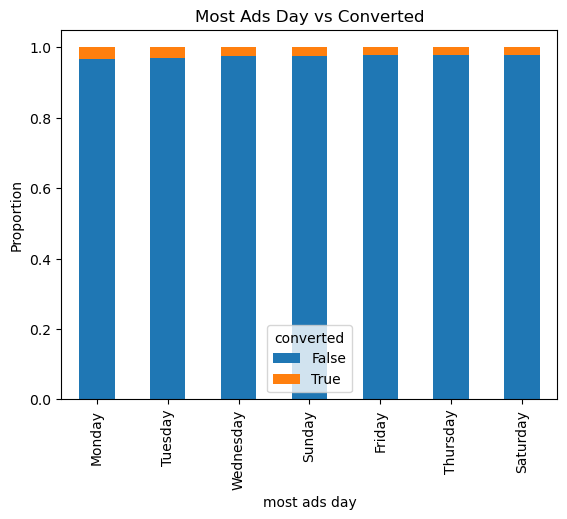

In [20]:
# Most Ads Day vs Converted
ct_day = pd.crosstab(df['most ads day'], df['converted'], normalize='index')
ct_day.sort_values(by=True, ascending=False, inplace=True)
ct_day.plot(kind='bar', stacked=True)
plt.title("Most Ads Day vs Converted")
plt.ylabel("Proportion")
plt.show()

In [13]:
df['most ads day'].describe()

count     588101
unique         7
top       Friday
freq       92608
Name: most ads day, dtype: object

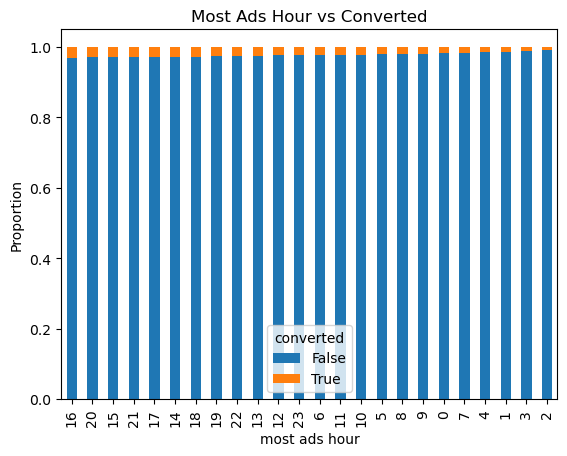

count    588101.000000
mean         14.469061
std           4.834634
min           0.000000
25%          11.000000
50%          14.000000
75%          18.000000
max          23.000000
Name: most ads hour, dtype: float64

In [14]:
# Most Ads Hour vs Converted
ct_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize='index')
ct_hour.sort_values(by=True, ascending=False, inplace=True)
ct_hour.plot(kind='bar', stacked=True)
plt.title("Most Ads Hour vs Converted")
plt.ylabel("Proportion")
plt.show()
df['most ads hour'].describe()

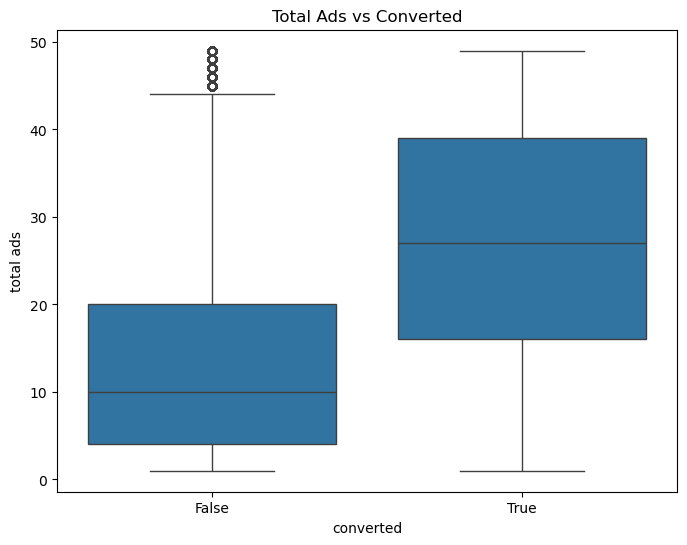

In [25]:
#  Boxplot - Total Ads vs Converted
plt.figure(figsize=(8, 6))
sns.boxplot(x='converted', y='total ads', data=df[df['total ads'] < 50])
plt.title("Total Ads vs Converted")
plt.show()


In [27]:
# Chi-Square Tests
for col in ['test group', 'most ads day', 'most ads hour']:
    table = pd.crosstab(df[col], df['converted'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"Chi-Square Test for {col} vs converted:")
    print(f"\tChi2: {chi2:.4f}, P-value: {p:.4e}")

Chi-Square Test for test group vs converted:
	Chi2: 54.0058, P-value: 1.9990e-13
Chi-Square Test for most ads day vs converted:
	Chi2: 410.0479, P-value: 1.9322e-85
Chi-Square Test for most ads hour vs converted:
	Chi2: 430.7687, P-value: 8.0276e-77


In [31]:
# SECTION 10: Mann-Whitney U Test (Numerical vs Converted)
# Split data into two groups
converted_ads = df[df['converted'] == True]['total ads']
not_converted_ads = df[df['converted'] == False]['total ads']

In [32]:
# Normality Test
stat1, p1 = shapiro(converted_ads)
stat2, p2 = shapiro(not_converted_ads)
print("Shapiro P-values (Normality):", p1, p2)

Shapiro P-values (Normality): 1.638680987007864e-98 9.883049430733551e-204


C:\Users\r7783\Documents\MATLAB\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14843.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\r7783\Documents\MATLAB\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 573258.
  res = hypotest_fun_out(*samples, **kwds)


In [33]:
# Variance Equality Test
stat_levene, p_levene = levene(converted_ads, not_converted_ads)
print("Levene P-value (Variance Equality):", p_levene)

Levene P-value (Variance Equality): 0.0


In [34]:
# Since assumptions failed, use Mann-Whitney U
u_stat, p_value_u = mannwhitneyu(converted_ads, not_converted_ads)
print("Mann-Whitney U Test:")
print("\tU-statistic:", u_stat)
print("\tP-value:", p_value_u)

if p_value_u < 0.05:
    print("Conclusion: Statistically significant difference in ad views between converted and not converted users.")
else:
    print("Conclusion: No significant difference.")


Mann-Whitney U Test:
	U-statistic: 7269106736.0
	P-value: 0.0
Conclusion: Statistically significant difference in ad views between converted and not converted users.


In [16]:
# Cal Cliff's Delta for non-parametric data
converted_ads = df[df['converted'] == True]['total ads']
not_converted_ads = df[df['converted'] == False]['total ads']

def cliffs_delta(x, y):
    from itertools import product
    n, m = len(x), len(y)
    
# Goes through each (i, j) pair from x and y.If i > j, we count 1.Sums up all such comparisons where x value is greater than y value.
# Similarly, counts how many times a value in x is less than a value in y. This gives the total number of losses for group x.

    greater = sum(1 for i, j in product(x, y) if i > j)
    less = sum(1 for i, j in product(x, y) if i < j)
    return (greater - less) / (n * m)

delta = cliffs_delta(converted_ads, not_converted_ads)
print("Cliff's Delta:", delta)

Cliff's Delta: 0.7085953887113865


## CONCLUSION